In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/0.MKCE/Datasets/Credit Card Customer Data.xlsx")

In [ ]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df=df.drop(['Sl_No','Customer Key'],axis=1)
df.shape

(660, 5)

In [ ]:
import sklearn
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(7)
km.fit(df)

KMeans(n_clusters=7)

In [ ]:
df['Group or Cluster'] = km.fit_predict(df)

In [ ]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group or Cluster
0,100000,2,1,1,0,4
1,50000,3,0,10,9,5
2,50000,7,1,3,4,5
3,30000,5,1,1,4,3
4,100000,6,0,12,3,4


In [ ]:
df['Group or Cluster'].value_counts()

0    208
6    183
3     84
5     70
1     66
2     27
4     22
Name: Group or Cluster, dtype: int64

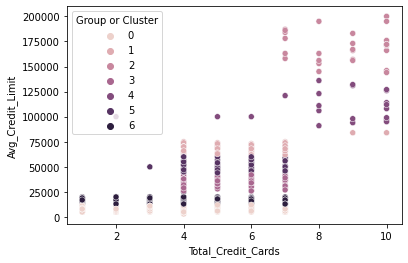

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['Total_Credit_Cards'],
                y=df['Avg_Credit_Limit'],
                hue=df['Group or Cluster'])

In [ ]:
 #With in cluster sum of squares
wcss=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001,  
                verbose=0, 
                random_state=None, 
                copy_x=True,  
                algorithm='auto')
  
  kmeans.fit(df)

  wcss.append(kmeans.inertia_)

wcss

[932931381367.3062,
 315872395950.9444,
 93831380393.81113,
 53044233315.98277,
 30884756691.957493,
 23727307391.24029,
 17506504292.41333]

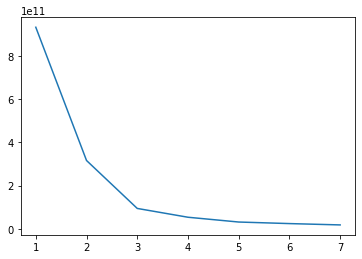

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,8),wcss)  #Elbow Graph

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  Group or Cluster  
0                    1                 0                 5  
1                   10                 9                 6  
2                    3                 4                 6  
3                    1                 4                 4  
4                   12                 3                 5  
3    208
1    183
4     84
6     70
0     66
2     27
5     22
Name: Group or Cluster, dtype: int64


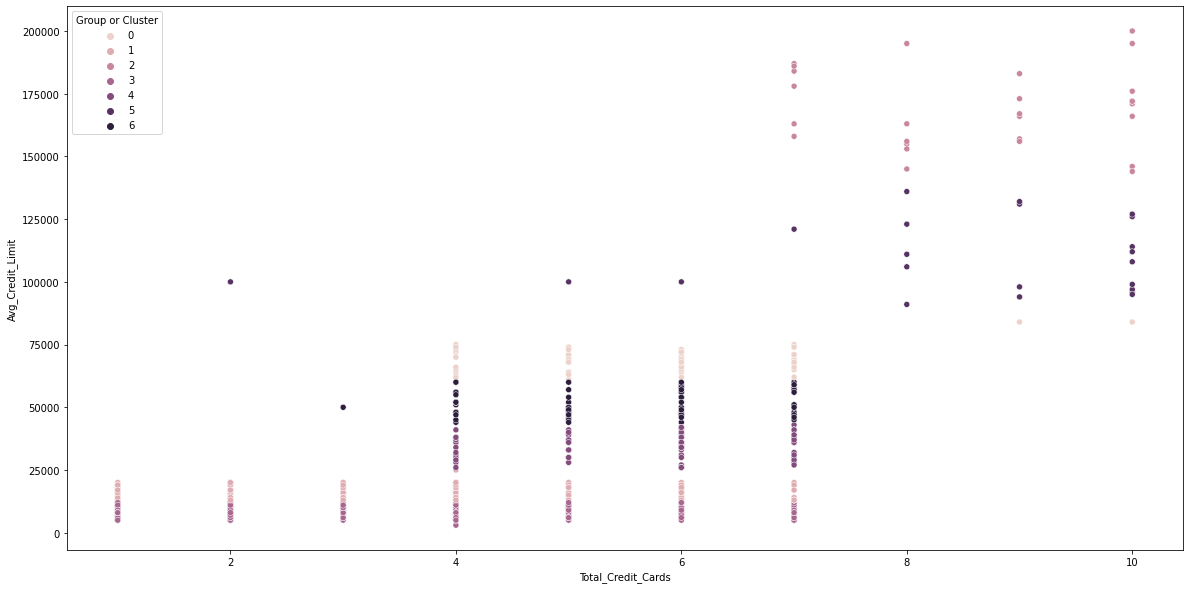

In [37]:
plt.figure(figsize=[20,10])
km = KMeans(7)
km.fit(df)
df['Group or Cluster'] = km.fit_predict(df)
print(df.head())
print(df['Group or Cluster'].value_counts())

sns.scatterplot(x=df['Total_Credit_Cards'],
                y=df['Avg_Credit_Limit'],
                hue=df['Group or Cluster'])

In [35]:
import sklearn.metrics as metrics
for i in range(3,10):
    kmeans=KMeans(n_clusters=i,
                  init="k-means++",
                  random_state=200)
    kmeans.fit(df)
    labels=kmeans.labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,
                                         labels,
                                         metric="euclidean",
                                         sample_size=1000,
                                         random_state=200)))

Silhouette score for k(clusters) = 3 is 0.7187172120356371
Silhouette score for k(clusters) = 4 is 0.6987312403864766
Silhouette score for k(clusters) = 5 is 0.705192204394589
Silhouette score for k(clusters) = 6 is 0.5994220912152705
Silhouette score for k(clusters) = 7 is 0.6223015194723697
Silhouette score for k(clusters) = 8 is 0.6177741941721762
Silhouette score for k(clusters) = 9 is 0.6200955853820639


In [38]:
km = KMeans(3)
km.fit(df)
df['Group or Cluster'] = km.fit_predict(df)

In [40]:
first_group = df[df['Group or Cluster']==0]

second_group=df[df['Group or Cluster']==1]

third_group = df[df['Group or Cluster']==2]

In [41]:

first_group.to_csv('first_group.csv')  #Get output file
second_group.to_csv('second_group.csv')
third_group.to_csv('third_group.csv')